# Importing necessary libraries

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder

# Loading data

In [15]:
df = pd.read_csv('../dataset/letter-recognition.csv')

df.head(10)

There are NaNs in dataset


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


## Check for missing values

There are no NaNs in dataset


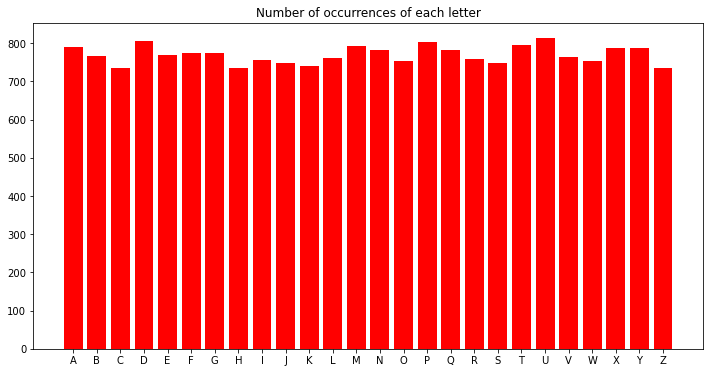

In [40]:
if(df.isnull().values.any()):
    print("There are NaNs in dataset")
else:
    print("There are no NaNs in dataset")
    
    
x_val = np.arange(0,26)
x_tic = [ chr(ord('A') + l) for l in x_val]
y_val = [(df['letter'] == x_tic[i]).sum() for i in range(26)]

plt.figure(figsize=(12,6))
plt.bar(x_val, y_val, color='r')
plt.xticks(x_val, x_tic)
plt.title('Number of occurrences of each letter')
plt.show()

Dataset is balanced and there is no need for oversample or undersample some letters.

## Data preprocessing

In [49]:
# Input data
X = df.iloc[:,1:].to_numpy()
# Output data
y = df.iloc[:, 0].to_numpy()

print("Dimensions of input data: " + str(X.shape))
print("Dimensions of output data: " + str(y.shape))

# Split data on train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Enumerate output data
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# Normalize input data
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

Dimensions of input data: (20000, 16)
Dimensions of output data: (20000,)


# Simple model

In [54]:
model = SVC(C=1, kernel='rbf')

model.fit(X_train, y_train)

SVC(C=1)

## Model evaluation

In [57]:
print("Train mean accuracy: %.4f" %model.score(X_train, y_train))
print("Test mean accuracy: %.4f" %model.score(X_test, y_test))

Train mean accuracy: 0.9588
Test mean accuracy: 0.9500


## Hyperparameter tuning

In [90]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

hyper_params = [ {'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]

model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 28.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

## Results

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.519309,0.243302,2.276535,0.097599,1,0.1,"{'C': 1, 'gamma': 0.1}",0.948125,0.955937,0.951250,...,0.950937,0.003023,5,0.972266,0.969688,0.970547,0.970781,0.972109,0.971078,0.000978
1,4.838894,0.056331,3.035604,0.092435,1,0.01,"{'C': 1, 'gamma': 0.01}",0.830625,0.843750,0.845938,...,0.840188,0.006446,11,0.853359,0.847812,0.848359,0.847031,0.852031,0.849719,0.002502
2,10.389809,0.247960,3.969394,0.126676,1,0.001,"{'C': 1, 'gamma': 0.001}",0.684688,0.698125,0.697187,...,0.691125,0.005744,14,0.695781,0.696797,0.695391,0.690859,0.694844,0.694734,0.002040
3,23.357129,2.597080,4.669637,0.314672,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.255625,0.254688,0.235937,...,0.237875,0.020991,16,0.267422,0.261719,0.245391,0.256953,0.218594,0.250016,0.017302
4,4.966719,0.104052,2.225039,0.057946,10,0.1,"{'C': 10, 'gamma': 0.1}",0.966875,0.972187,0.970625,...,0.969313,0.002213,1,0.997266,0.997578,0.997344,0.997188,0.997422,0.997359,0.000134
5,3.596705,0.116364,2.269284,0.075982,10,0.01,"{'C': 10, 'gamma': 0.01}",0.911875,0.922500,0.914062,...,0.912813,0.006474,7,0.931719,0.926953,0.928359,0.929453,0.929531,0.929203,0.001567
6,6.544964,1.436084,4.396717,0.759401,10,0.001,"{'C': 10, 'gamma': 0.001}",0.810000,0.815312,0.816875,...,0.816125,0.003985,12,0.827969,0.822187,0.825000,0.822031,0.828125,0.825062,0.002656
7,12.823213,0.422066,4.812083,0.198552,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.683125,0.696562,0.697500,...,0.690438,0.005898,15,0.694766,0.696953,0.695391,0.691094,0.693906,0.694422,0.001939
8,5.122094,0.223478,2.305950,0.051677,100,0.1,"{'C': 100, 'gamma': 0.1}",0.965000,0.972187,0.972187,...,0.968938,0.003287,3,0.999922,1.000000,0.999922,0.999844,0.999922,0.999922,0.000049
9,4.025817,0.206156,1.745369,0.247500,100,0.01,"{'C': 100, 'gamma': 0.01}",0.942813,0.954063,0.945937,...,0.946562,0.004889,6,0.978594,0.977266,0.978125,0.977500,0.977344,0.977766,0.000513


In [92]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9693125 corresponding to hyperparameters {'C': 10, 'gamma': 0.1}


## Optimal hyperparameters

In [93]:
model = SVC(C=10, kernel='rbf', gamma=0.1)
model.fit(X_train, y_train)
print("Train mean accuracy: %.4f" %model.score(X_train, y_train))
print("Test mean accuracy: %.4f" %model.score(X_test, y_test))

Train mean accuracy: 0.9971
Test mean accuracy: 0.9788


# Saving prediction

In [94]:
y_pred = (encoder.inverse_transform(model.predict(X_test))).astype(str)
df_out = pd.DataFrame(y_pred, columns=['prediction'])
df_out.to_csv("../prediction/submission.csv", index=False)